In [1]:
!pip install --quiet quandl plotly git+https://github.com/ethho/memoize.git lmfit
!wget -O final_proj.py https://github.com/ethho/finm-33150/raw/main/final_proj.py

--2023-03-03 17:10:54--  https://github.com/ethho/finm-33150/raw/main/final_proj.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ethho/finm-33150/main/final_proj.py [following]
--2023-03-03 17:10:54--  https://raw.githubusercontent.com/ethho/finm-33150/main/final_proj.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15192 (15K) [text/plain]
Saving to: ‘final_proj.py’

final_proj.py       100%[===================>]  14.84K  --.-KB/s    in 0.002s  

2023-03-03 17:10:55 (7.55 MB/s) - ‘final_proj.py’ saved [15192/15192]



In [2]:
!echo '{"NASTAQ_DATA_API_KEY": "XXXmy_quandl_api_keyXXX"}' > ./secrets.json

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import final_proj
import strat_returns

# 20230304_analyze_strat1a_returns

Ethan Ho 3/4/2023

@mpcs
@finm

----

# Fetch Data

We can fetch data by reading an existing `uszcb.csv` file using `final_proj.read_uszcb`, or creating it with `final_proj.main`:

In [57]:
df = pd.read_csv('./data/final_proj/strat_n1A_135.csv', index_col=0, parse_dates=True)
df

,1,-1,0,signal,pnl,pnl_pct,long_pnl_pct,short_pnl_pct
date,,,,,,,,
2001-08-29,7083.758169,-15233.564599,0,1,7083.758169,0.354188,0.354188,-0.761678
2001-09-26,59104.219350,-67254.025780,0,1,59104.219350,2.955211,2.955211,-3.362701
2001-10-24,13346.825553,-21496.631983,0,1,13346.825553,0.667341,0.667341,-1.074832
2001-11-21,3285.293131,-11435.099561,0,1,3285.293131,0.164265,0.164265,-0.571755
2001-12-19,19846.550845,-27996.357275,0,1,19846.550845,0.992328,0.992328,-1.399818
...,...,...,...,...,...,...,...,...
2022-08-03,-11408.291077,3258.484647,0,-1,3258.484647,0.162924,-0.570415,0.162924
2022-08-31,-16841.558214,8691.751785,0,-1,8691.751785,0.434588,-0.842078,0.434588
2022-09-28,-23270.162963,15120.356533,0,-1,15120.356533,0.756018,-1.163508,0.756018


# Plot PnL Series

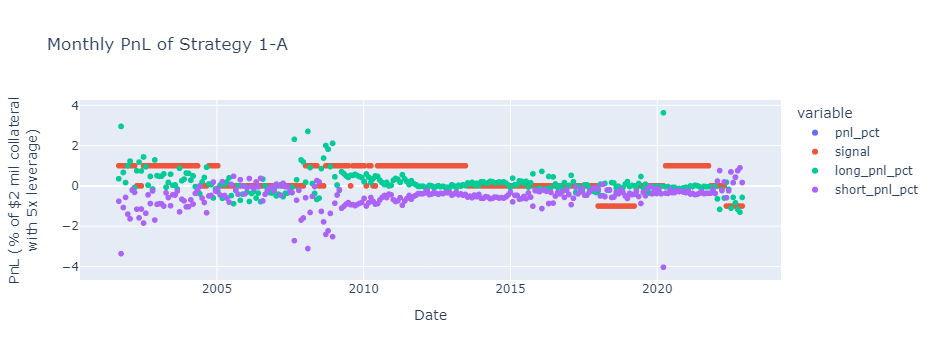

In [63]:
def plot_pnl(**kw):
    fig = px.scatter(
        df[[
            'pnl_pct', 'signal',
            'long_pnl_pct', 'short_pnl_pct'
        ]].rename({
        }),
        labels = {
            'date': 'Date',
            'value': 'PnL (% of $2 mil collateral<br>with 5x leverage)',
        },
        title=f'Monthly PnL of Strategy 1-A',
        **kw
    )
    return fig

plot_pnl()

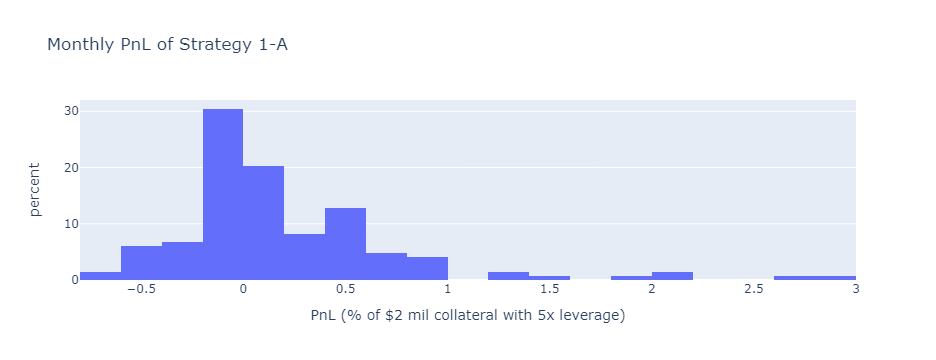

In [64]:
pnl_not_flat = df.loc[df['signal'] != 0., 'pnl_pct']

def plot_pnl_dist(**kw):
    fig = px.histogram(
        pnl_not_flat,
        labels = {
            'date': 'Date',
            'value': 'PnL (% of $2 mil collateral with 5x leverage)',
        },
        title=f'Monthly PnL of Strategy 1-A',
        # cumulative=True,
        nbins=20,
        histnorm='percent',
        **kw
    )
    fig.update_layout(showlegend=False)
    return fig

plot_pnl_dist()